In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

users_df = pd.read_csv("../../cleaned_datasets/users_details_dataset_cleaned.csv")
anime_df = pd.read_csv("../../cleaned_datasets/anime_dataset_cleaned.csv")
user_score_df = pd.read_csv("../../cleaned_datasets/user_scores_cleaned.csv")

EDA Ramachandran(50611273)

Hypotheses 1: 
What is the difference in the genres explored by users of different countries?
- This would help in getting a list of genres to suggest animes from to a user from a partiocular country

In [3]:
# Keep users that are in both CSVs
common_users = pd.merge(user_score_df, users_df, left_on=['user_id', 'Username'], right_on=['Mal ID', 'Username'], how='inner')

user_score_df = user_score_df[user_score_df.set_index(['user_id', 'Username']).index.isin(common_users.set_index(['user_id', 'Username']).index)]
users_df = users_df[users_df.set_index(['Mal ID', 'Username']).index.isin(common_users.set_index(['user_id', 'Username']).index)]


In [4]:
# Add column location
user_score_df['Location'] = user_score_df.user_id.map(users_df.set_index('Mal ID')['Location'])
user_score_df = user_score_df[~user_score_df["Location"].isna()]
user_score_df['Location'].unique()

array(['United States', 'Australia', 'Norway', 'Canada', 'France',
       'Latvia', 'Sweden', 'Finland', 'Malaysia', 'Netherlands',
       'Belgium', 'Switzerland', 'Japan', 'United Kingdom', 'Lithuania',
       'Greece', 'Mexico', 'Singapore', 'Brazil', 'Iceland', 'Ireland',
       'Trinidad and Tobago', 'Croatia', 'Israel', 'Argentina', 'Germany',
       'Poland', 'Philippines', 'Portugal', 'Peru', 'Romania',
       'El Salvador', 'South Africa', 'Denmark', 'Venezuela', 'Mauritius',
       'Russia', 'Slovakia', 'Chile', 'Estonia', 'China', 'Puerto Rico',
       'Dominican Republic', 'Hungary', 'Bulgaria', 'Panama', 'Hong Kong',
       'Austria', 'Maldives', 'Italy', 'Turkey', 'Ukraine', 'Brunei',
       'Réunion', 'Antarctica', 'Iraq', 'Slovenia', 'New Zealand',
       'Armenia', 'Spain', 'India', 'Tunisia', 'Indonesia', 'Serbia',
       'Taiwan', 'Saudi Arabia', 'Kuwait', 'Malta', 'Bahrain', 'Jamaica',
       'Costa Rica', 'Paraguay', 'South Korea', 'Jersey', 'Bangladesh',
       'T

In [5]:
# Add column genre for anime's genre
user_score_df['Genres'] = user_score_df.anime_id.map(anime_df.set_index('anime_id')['Genres'])
user_score_df = user_score_df[~user_score_df["Genres"].isna()]

In [6]:
# group by countries to identify genres

def unique_genres(genres):
    return ', '.join(set(g.strip() for g in ', '.join(genres).split(',')))

# group by country and get unique genres
user_score_df_group = user_score_df.groupby(by="Location")[["Genres"]].agg(unique_genres)
user_score_df_group

# Add column for genre counts
user_score_df_group["count"] = user_score_df_group["Genres"].apply(lambda x: len(x.split(",")))
user_score_df_group.sort_values(by="count")

,Genres,count
Location,,
New Caledonia,"Drama, Romance, Supernatural",3
Ghana,"Fantasy, Drama, Action, Adventure",4
Kosovo,"Comedy, Adventure, Action, Romance, Supernatur...",7
Madagascar,"Comedy, Adventure, Romance, Supernatural, Sci-...",7
Mozambique,"Comedy, Adventure, Action, Romance, Mystery, F...",7
...,...,...
Jersey,"Hentai, Gourmet, Action, Ecchi, Award Winning,...",21
Japan,"Hentai, Gourmet, Action, Ecchi, Award Winning,...",21
Jamaica,"Hentai, Gourmet, Action, Award Winning, Ecchi,...",21


<Axes: xlabel='Location'>

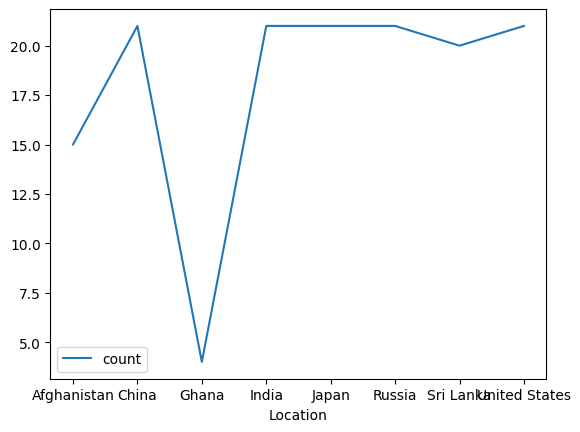

In [9]:
user_score_df_group.reset_index(inplace=True)
user_score_df_group_filtered = user_score_df_group[user_score_df_group["Location"].isin(["India", "United States", "Afghanistan", "China", "Japan", "Ghana", "Russia", "Sri Lanka"])]
user_score_df_group_filtered.plot(x="Location", y="count")

Inference:
We can see that for different countries the number of genres explored is different. But it can also be seen that in most developed countries the genres explored is maximum, and for less developed countries it is low. 
So we can recommend animes from a variety of genre to a user from developed country, but from a niche genre for less countries.

Hypotheses 2: 
Is there a difference in episodes watched by a user based on gender and age?

/var/folders/dz/fg9tl53x4y16ytgmdhwdt0kr0000gn/T/ipykernel_7026/2672423783.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  users_male = user_df_male.groupby(by="age_group")["Episodes Watched"].mean().to_frame()
/var/folders/dz/fg9tl53x4y16ytgmdhwdt0kr0000gn/T/ipykernel_7026/2672423783.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  users_female = user_df_female.groupby(by="age_group")["Episodes Watched"].mean().to_frame()


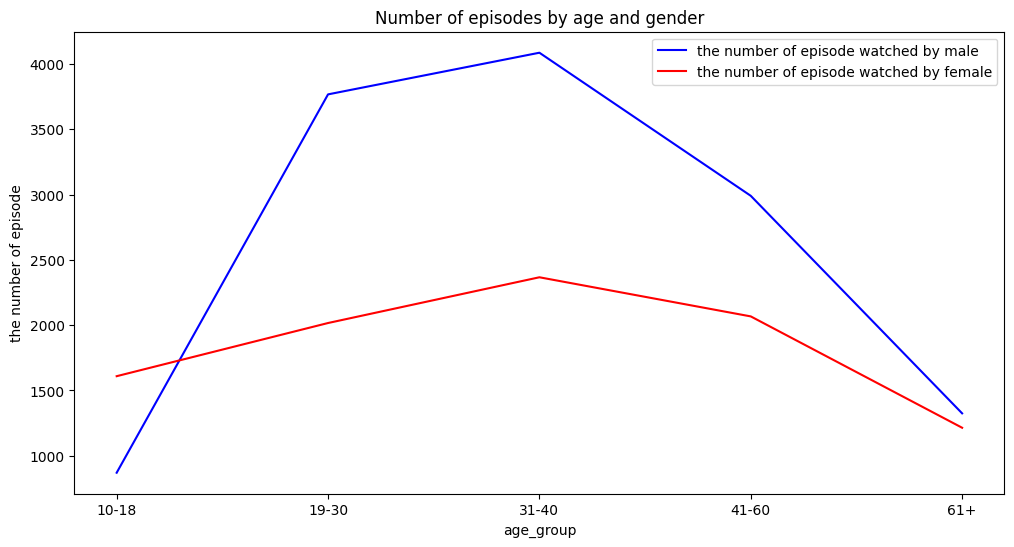

In [41]:
users_df['Age'] = (pd.to_datetime("2024-01-01") - pd.to_datetime(users_df["Birthday_Date"])) / np.timedelta64(52, 'W')
age_boundaries = [10, 18, 30, 40, 60, float('inf')]
age_labels = ['10-18', '19-30', '31-40', '41-60', '61+']

users_df['age_group'] = pd.cut(users_df['Age'], bins=age_boundaries, labels=age_labels, right=False)

users_df.dropna()
users_df = users_df[~users_df["Gender"].isna()]
user_df_male = users_df[users_df["Gender"]=="Male"]
user_df_female = users_df[users_df["Gender"]=="Female"]

users_male = user_df_male.groupby(by="age_group")["Episodes Watched"].mean().to_frame()
users_female = user_df_female.groupby(by="age_group")["Episodes Watched"].mean().to_frame()

users_male.reset_index(inplace=True)
users_female.reset_index(inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(users_male['age_group'], users_male['Episodes Watched'], label="the number of episode watched by male", color='blue')
plt.plot(users_female['age_group'], users_female['Episodes Watched'], label="the number of episode watched by female", color='red')
plt.title("Number of episodes by age and gender")
plt.legend()
plt.xlabel("age_group")
plt.ylabel("the number of episode")
plt.show()



Inference:
So, we can see that male and female have a similar tendency across age. But the number of anime episodes seen by male is much larger than females episode count. This can be used further when we have more info on relation between no. of episodes and animes and genre.

Understanding user genres relations across countries and genders
Steps:
    1. group user_score by users. group genres watched by 